In [8]:
getwd()

[1] "/sharedFolder/Paper_clusters_from_scratch/0_September"

In [2]:
source("6_run.r")

In [4]:
tic()
for (i in timepoints) {
    run.month(file_name = i, 
              path_to_data = "/sharedFolder/Data/",
              dir_save = "/sharedFolder/Paper_clusters_from_scratch/0_September/plots_oct/")
}
elapsed <- toc(log = TRUE, quiet = T)

[1] "/sharedFolder/Data/expression_1month"
[1] "Preprocessing"


Warning message:
“Input parameters result in NA values for initial cell identities. Setting all initial idents to the project name”
Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”
Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”


[1] "Clustering"


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’



[1] "Markers"


Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file 'FALSE/markers_1month.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


In [4]:
total_time(elapsed$toc - elapsed$tic)

63127.891 sec elapsed


In [ ]:
de_genes <- read.csv("plots_oct/Res_1month/")

# plots estetics

In [66]:
# LOAD LIBRARIES
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(presto))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(tictoc))

suppressPackageStartupMessages(library(enrichR))
suppressPackageStartupMessages(library(org.Hs.eg.db))
suppressPackageStartupMessages(library(AnnotationDbi))

suppressPackageStartupMessages(library(SingleCellExperiment))
suppressPackageStartupMessages(library(SingleR))
suppressPackageStartupMessages(library(scuttle))
suppressPackageStartupMessages(library(zellkonverter))
suppressPackageStartupMessages(library(patchwork))

In [19]:
timepoints <- c("1month", "2month", "3month")
genes_of_interest <- "SRCIN1"
pt.size <- 1

In [17]:
file_name <- timepoints[1]
file_name
dir_save <- paste0("plots_oct/Plot_", file_name, "/")
dir.create(dir_save, recursive = T, showWarnings = F)
dir_save

[1] "1month"

[1] "plots_oct/Plot_1month/"

In [4]:
getwd()

[1] "/sharedFolder/Paper_clusters_from_scratch/0_September"

In [10]:
load(paste0("plots_oct/Clustered_", file_name, "_.Robj"))

In [11]:
head(data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,percent.ribo,S.Score,G2M.Score,Phase,CC.Difference,RNA_snn_res.1,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>
1_AAACCTGGTAGAGGAA_1_1m,1month,2485,1258,0.04144869,0.1541247,-0.2623277,-0.5376040,G1,0.27527625,6,6
1_AAACCTGTCCTCAATT_1_1m,1month,2038,1063,0.03532875,0.1403337,-0.5180116,-0.4746011,G1,-0.04341043,6,6
1_AAACGGGGTTGAGGTG_1_1m,1month,1921,1040,0.02758980,0.1608537,-0.2574974,-0.6426267,G1,0.38512930,6,6
1_AAAGTAGTCCACGCAG_1_1m,1month,2028,1045,0.04142012,0.1558185,-0.6333845,-0.5503063,G1,-0.08307813,6,6
1_AACACGTTCACCGTAA_1_1m,1month,2535,1180,0.03589744,0.2536489,-0.6191935,-0.5378371,G1,-0.08135643,6,6
1_AACCATGCACCAGGCT_1_1m,1month,1843,941,0.05588714,0.1725448,-0.3817502,-0.6087057,G1,0.22695554,6,6
1_AACCGCGAGGAATGGA_1_1m,1month,2733,1352,0.04134651,0.1844127,-0.5528015,-0.4457293,G1,-0.10707220,6,6
1_AACCGCGTCGCACTCT_1_1m,1month,1879,917,0.03406067,0.2112826,-0.4014007,-0.5004577,G1,0.09905707,13,13
1_AACCGCGTCTTAACCT_1_1m,1month,2484,1100,0.02536232,0.2745572,-0.6497735,-0.4274424,G1,-0.22233114,13,13


,umap_1,umap_2,ident
,<dbl>,<dbl>,<fct>
1_AAACCTGGTAGAGGAA_1_1m,9.388097,-8.627746,6
1_AAACCTGTCCTCAATT_1_1m,9.059694,-8.399212,6
1_AAACGGGGTTGAGGTG_1_1m,10.107450,-8.257546,6
1_AAAGTAGTCCACGCAG_1_1m,9.004648,-7.766437,6
1_AACACGTTCACCGTAA_1_1m,8.484192,-8.050301,6
1_AACCATGCACCAGGCT_1_1m,8.450279,-7.598067,6


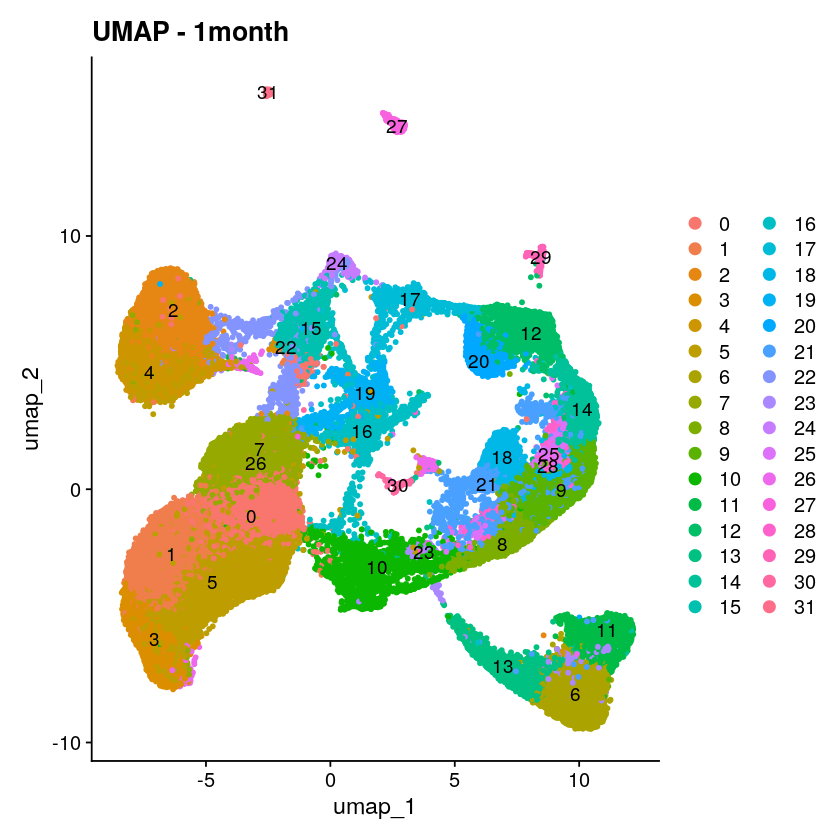

In [32]:
umap <- DimPlot(data, reduction = "umap", label = TRUE, pt.size = pt.size) + 
    ggtitle(paste("UMAP -",file_name))
save.csv(umap$data, file="./plots_oct/prova.csv" )
umap
head(umap$data)

In [49]:
summary(data@reductions$umap)

  Length    Class     Mode 
       2 DimReduc       S4 

In [ ]:
save.csv(umap$data, file="./plots_oct/prova.csv" )
a <- read.csv("./plots_oct/prova.csv")


In [ ]:
gene_plot <- FeaturePlot(data, features = genes_of_interest) &
    theme(aspect.ratio = 1)
gene_plot

In [ ]:
plot_blend <- umap | gene_plot +
                  plot_annotation(
                    title = paste(file_name, "-", genes_of_interest[1]),
                    subtitle = "UMAP colored by expression levels",
                    caption = "Subset of clusters with avg_log2FC > 0.6 - Seurat FeaturePlot (blend = TRUE)"
                  )
plot_blend

In [ ]:
ggsave(filename = paste0(dir_save, "Plot_", file_name,"_umap.png"), 
       plot = umap, 
       width = 1920*2, height = 1920*2, units = "px")
ggsave(filename = paste0(dir_save, "Plot_", file_name, "_", genes_of_interest,"_umap.png"), 
       plot = gene_plot, 
       width = 1920*2, height = 1920*2, units = "px")
ggsave(filename = paste0(dir_save, "Plot_", file_name, "_combined_umap&", genes_of_interest, ".png"), 
       plot = plot_blend, 
       width = 1920*2, height = 1920*2, units = "px")

In [118]:
mkpl <- function(
    file_name,
    load = T,
    data = "",
    genes_of_interest = "SRCIN1",
    dir_save = paste0("plots_oct/Plot_", file_name, "/"),
    pt.size = 0.5,
    width = 1920*2,
    height = 1920*2,
    scale.dimensions = 1,
    title.size = 40,
    print = 0,
    print.plot = 0
) {
    dir.create(dir_save, recursive = T, showWarnings = F)


    if (load) {
        load(paste0("plots_oct/Clustered_", file_name, "_.Robj"))
    } else {
        data <- data
    }
    
    umap <- DimPlot(data, reduction = "umap", label = TRUE, pt.size = pt.size) + 
    ggtitle(paste("UMAP -",file_name)) +
    theme(plot.title = element_text(size = title.size, 
                                    face = "bold", 
                                    hjust = 0.5)) &
    theme(aspect.ratio = 1)



    gene_plot <- FeaturePlot(data, features = genes_of_interest, pt.size = pt.size) + 
    ggtitle(paste(genes_of_interest, file_name, sep = " - ")) +
    theme(plot.title = element_text(size = title.size, 
                                    hjust = 0.5))  &
    theme(aspect.ratio = 1)

    plot_blend <- umap | gene_plot 



    width = width*scale.dimensions
    height = height*scale.dimensions


    a <- 1
    
    if (print > 0){
        if (print.plot == 0) {
            a <- 2
            print.plot <- plot_blend
        } else if (print.plot == 1) {
            print.plot <- umap
        } else if (print.plot == 2) {
            print.plot <- gene_plot
        } else {
            return("Error in print.plot, must be 0, 1, or 2")
        }
    }

    if (print == 1) {
        return(print.plot)
    } else if (print == 2) {
        ggsave(filename = paste0(getwd(), "/provv_2/Prova_Plot_", file_name, ".png"), 
           plot = print.plot, 
           width = width*a, height = height, units = "px")
        return(print.plot)
    }
    
    ggsave(filename = paste0(dir_save, "Plot_", file_name,"_umap.png"), 
           plot = umap, 
           width = width, height = height, units = "px")
    ggsave(filename = paste0(dir_save, "Plot_", file_name, "_", genes_of_interest,"_umap.png"), 
           plot = gene_plot, 
           width = width, height = height, units = "px")
    ggsave(filename = paste0(dir_save, "Plot_", file_name, "_combined_umap&", genes_of_interest, ".png"), 
           plot = plot_blend, 
           width = width*2, height = height, units = "px")

    return(list(umap, gene_plot, plot_blend))
}

In [76]:
getwd()

[1] "/sharedFolder/Paper_clusters_from_scratch/0_September"

In [77]:
file_name <- timepoints[1]
load(paste0("plots_oct/Clustered_", file_name, "_.Robj"))

Width: 1920 
Height: 1920 


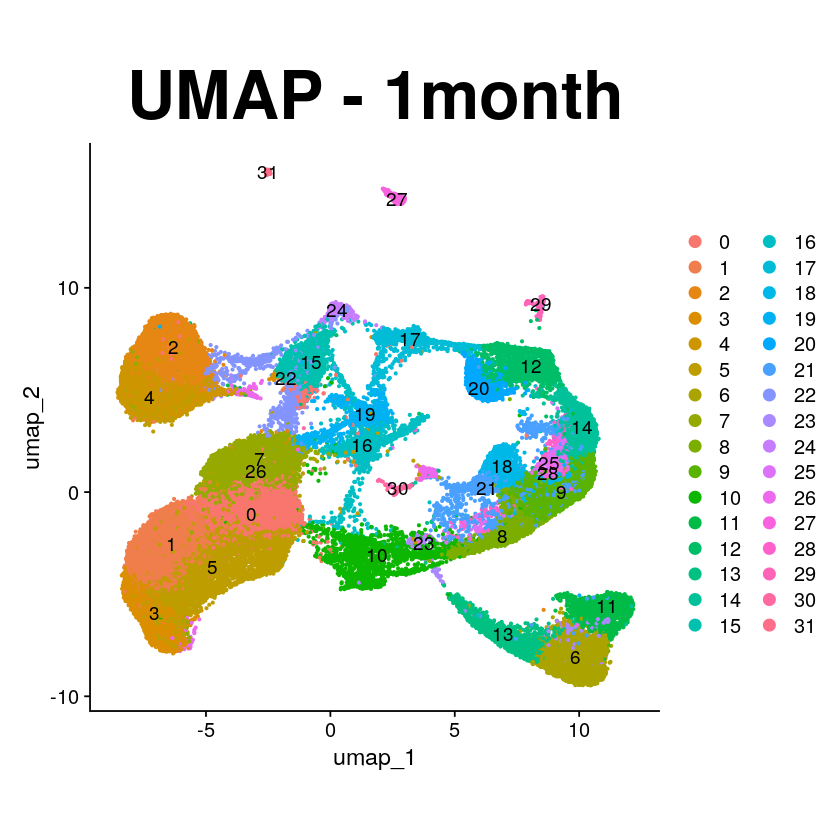

[[1]]

[[2]]

[[3]]


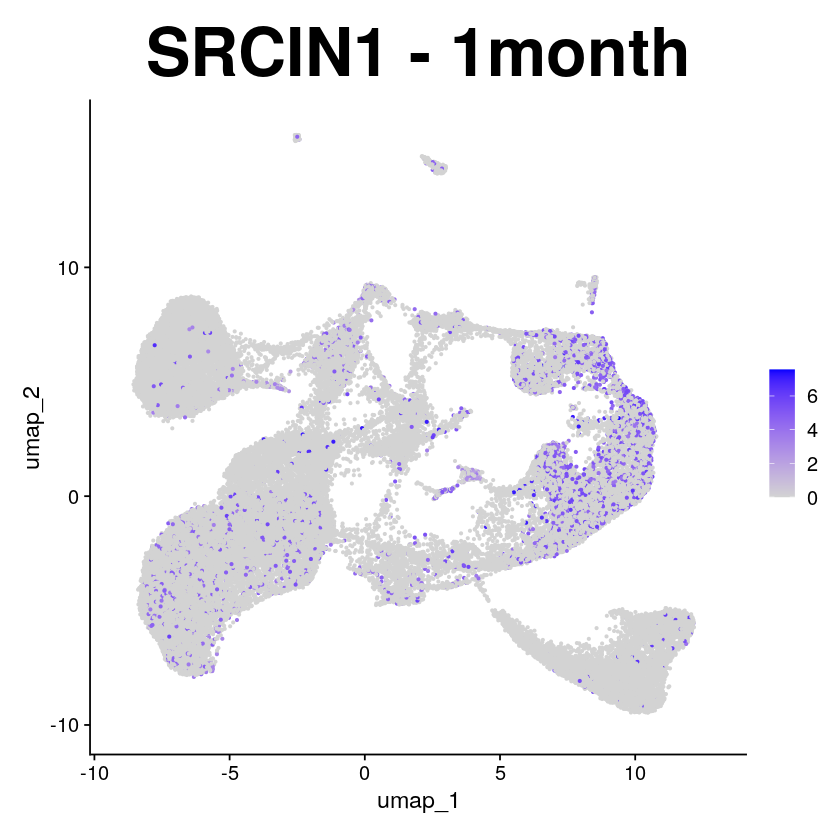

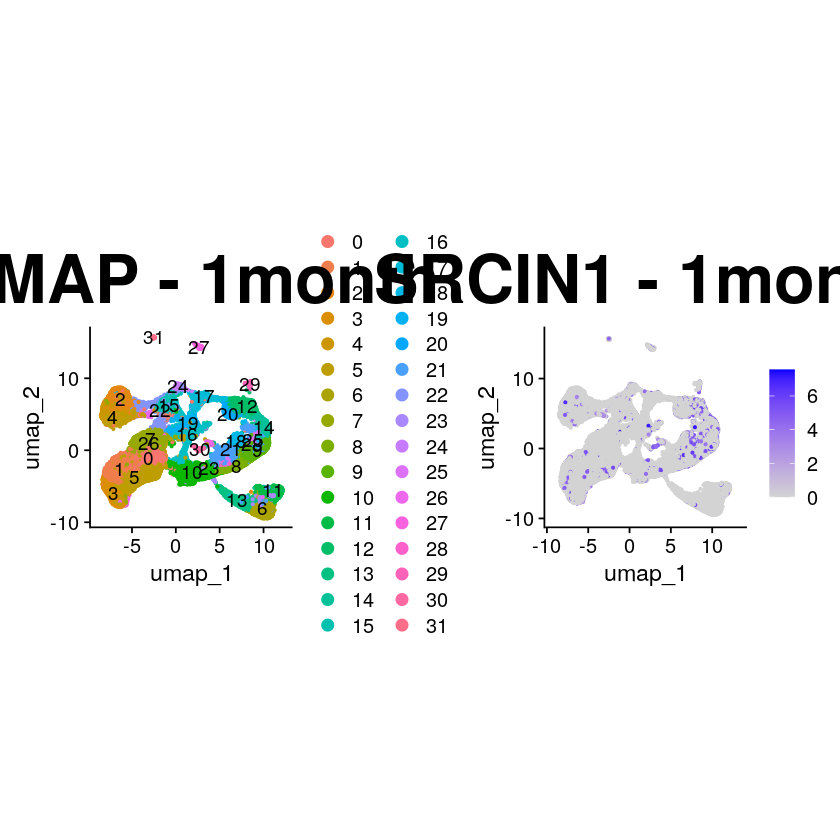

In [114]:
mkpl(file_name, 
     load = F,
     data = data,
     pt.size = 0.5,
     title.size = 40,
     print = 1,
     print.plot = 2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



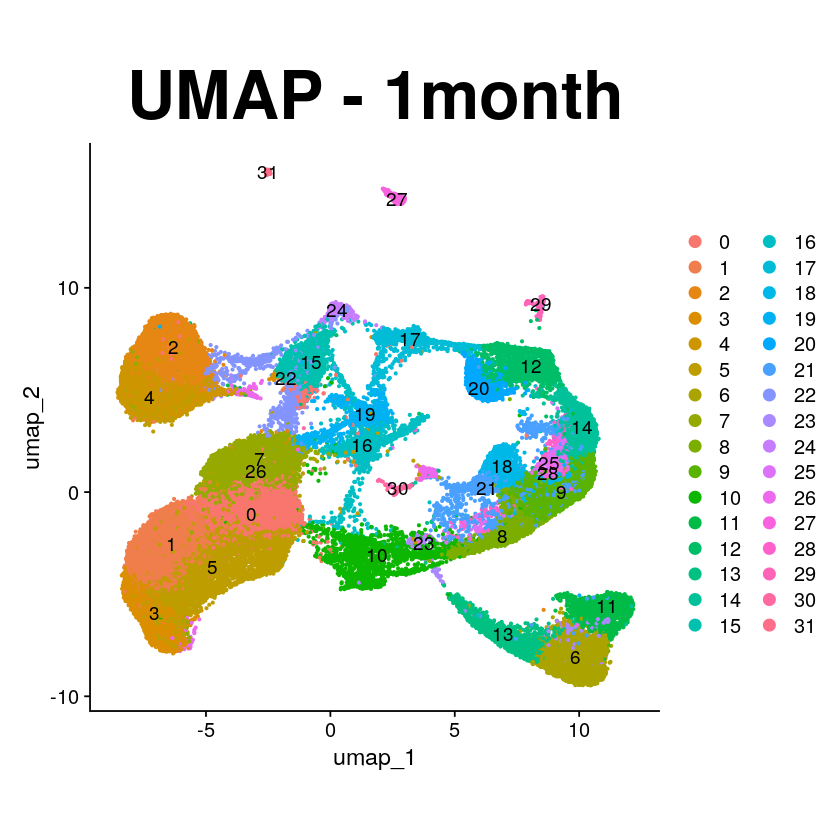

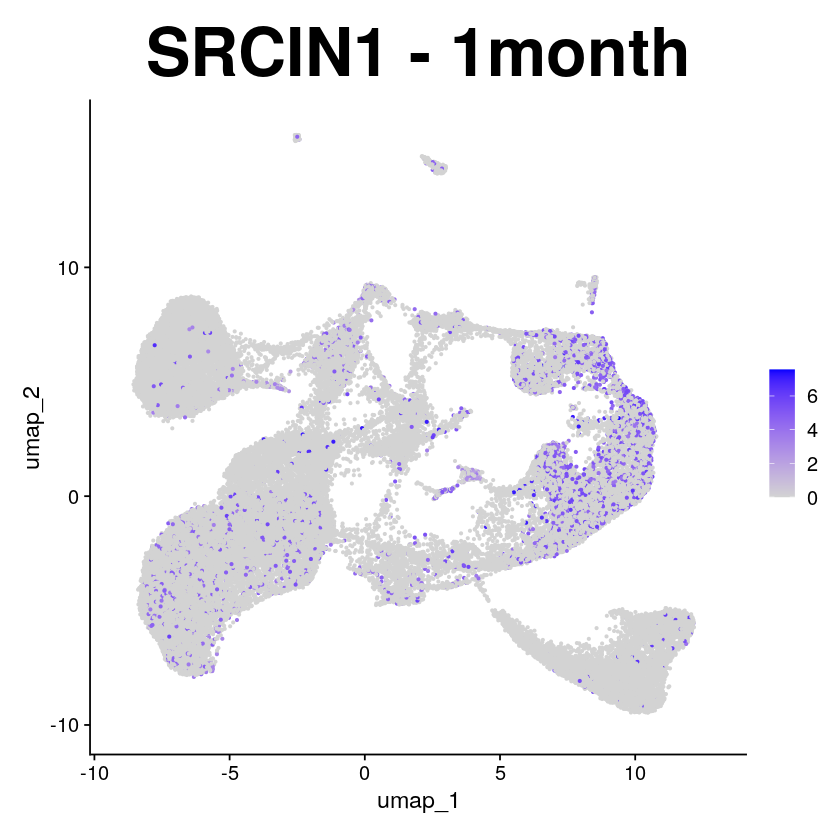

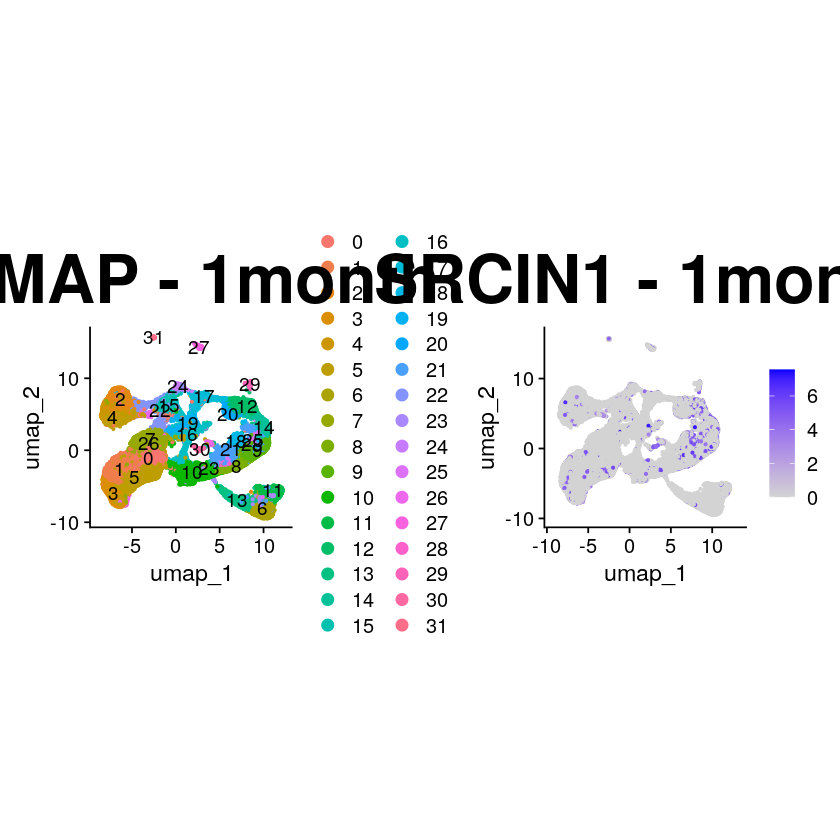

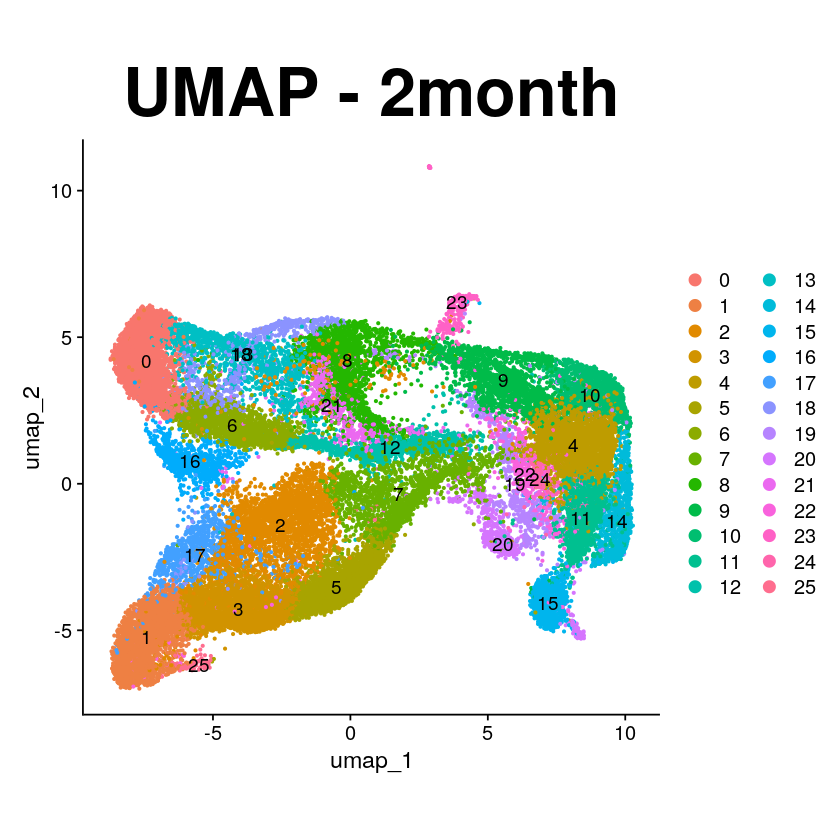

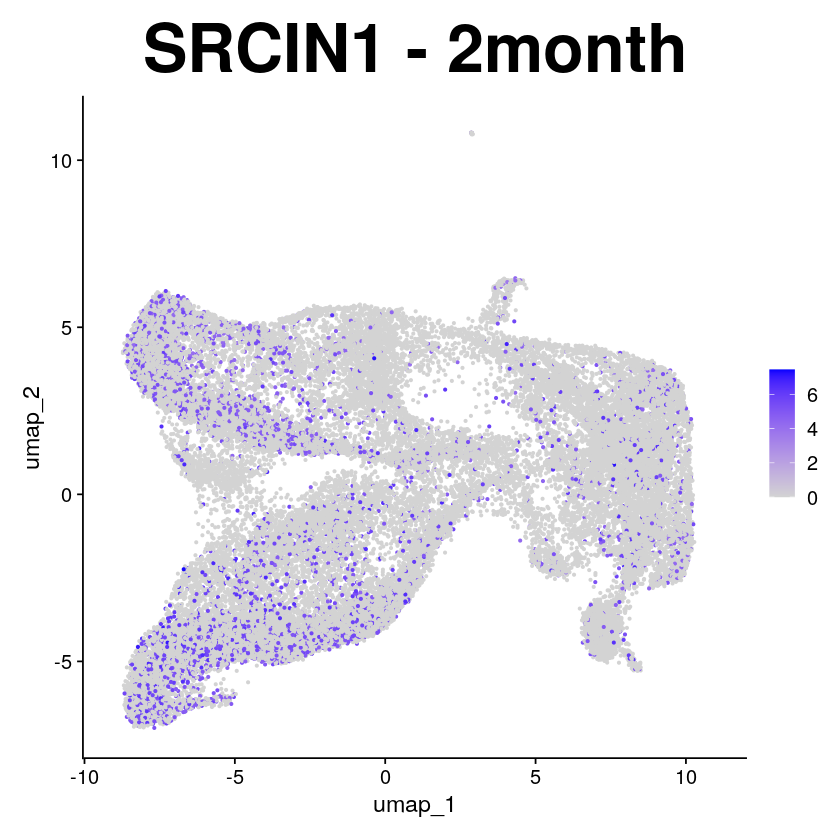

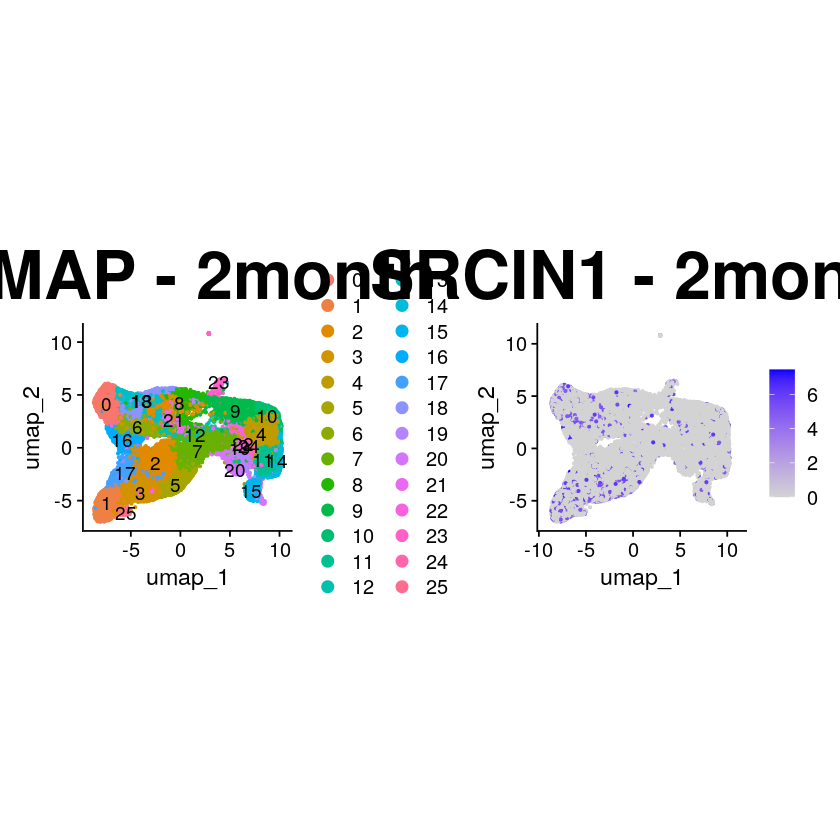

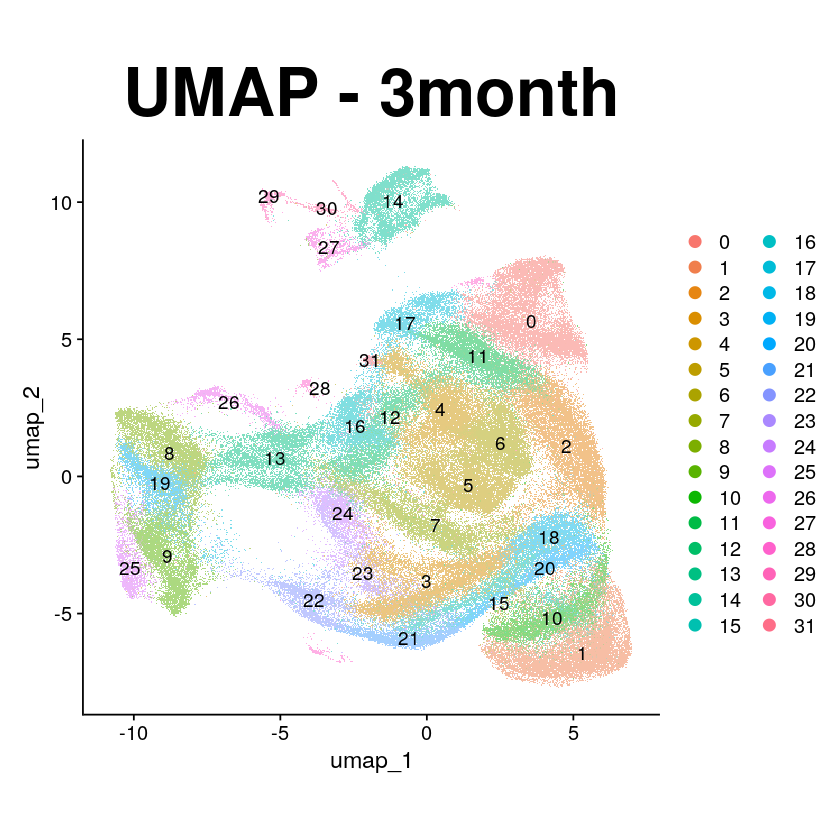

[[1]]
[[1]][[1]]

[[1]][[2]]

[[1]][[3]]


[[2]]
[[2]][[1]]

[[2]][[2]]

[[2]][[3]]


[[3]]
[[3]][[1]]

[[3]][[2]]

[[3]][[3]]



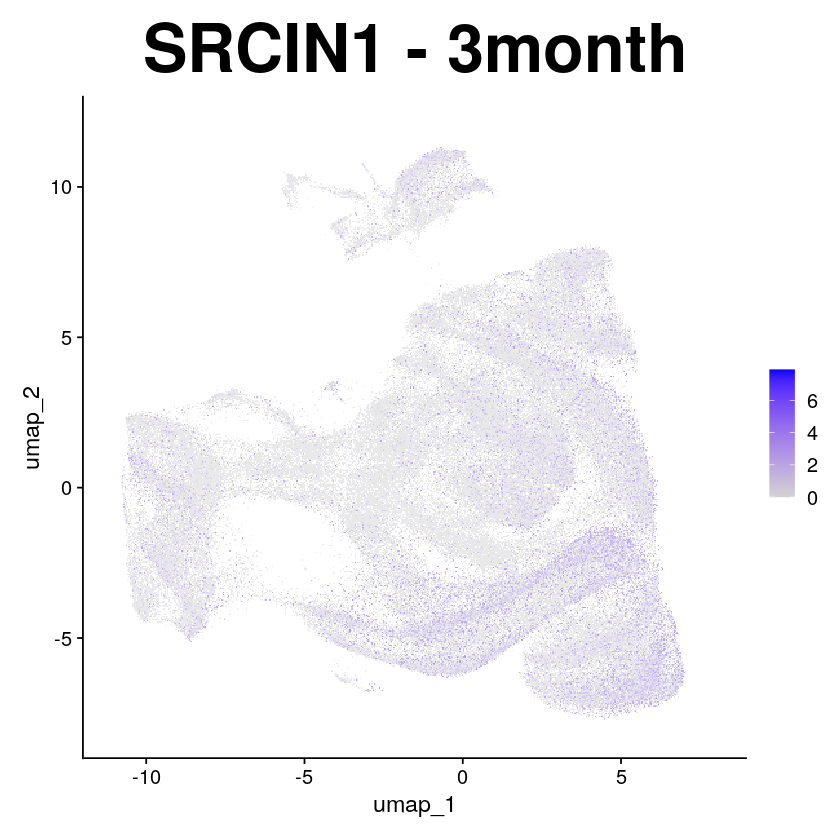

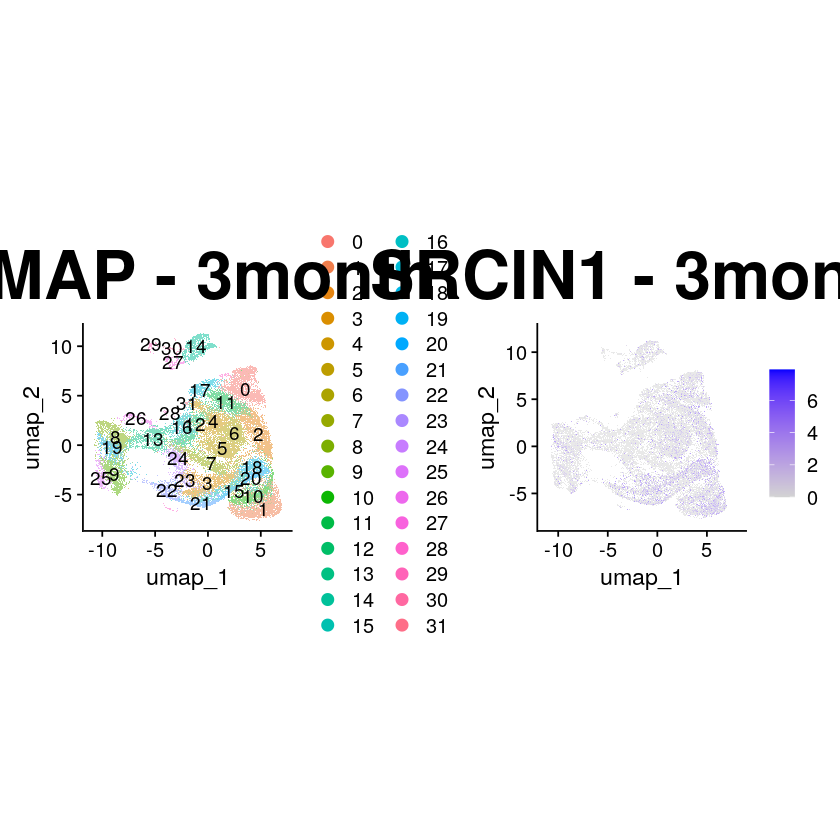

In [119]:
lapply(X = timepoints, FUN = mkpl)